In [1]:


import pickle
import numpy as np
from neuronunit.tests.dynamics import CVTest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)#http://0.0.0.0:8888/notebooks/BluePyOpt/Spike_Analysis.ipynb#
  print(mdf1)

from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
cholinergic = {'neuron':'115'}
import neuronunit

#df.hist(bins=len(df))



In [2]:
import pickle
import numpy as np
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  
  
with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:
  mdf2 = pickle.load(f)
  print(mdf2)

try:
    with open('membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf3 = pickle.load(f)
       print(mdf3)

    with open('membrane_dynamics_file.p','rb') as f:
       mdf = pickle.load(f)

    with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf0 = pickle.load(f)
       print(mdf0)

except:
   pass


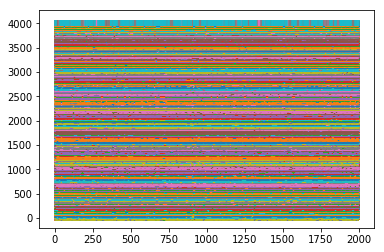

In [3]:


# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
tstop = 100
spike_trains = []

ass = mdf1.analogsignals[0]   
vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



plot the analog signal Block/Segment to get information about its length and sampling rate
[<AnalogSignal(array([[-59.111014  , -50.52556666, -52.018056  , ..., -52.21295069,
        -50.05981211, -52.69738065],
       [-59.11543682, -50.57270314, -52.05776716, ..., -52.25169222,
        -50.10926578, -52.73371209],
       [-59.11983763, -50.61960511, -52.09728076, ..., -52.29024102,
        -50.15847341, -52.76986278],
       ..., 
       [-53.47605558, -54.19222087, -54.41695531, ..., -54.1929002 ,
        -59.98822028, -60.        ],
       [-53.42634688, -54.21014784, -53.44179834, ..., -54.21083456,
        -59.98821934, -60.        ],
       [-53.37858287, -54.22819818, -52.50852019, ..., -54.22889206,
        -59.98821868, -60.        ]]) * mV, [0.0 ms, 2000.1 ms], sampling rate: 10.0 1/ms)>]
<class 'quantities.quantity.Quantity'>


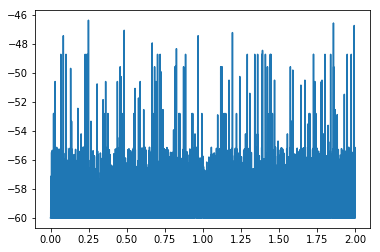

In [4]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
print(mdf1.analogsignals)
ass = mdf1.analogsignals[0][143]    
from neuronunit.models import static_model
print(type(ass))
sm = static_model.StaticModel(ass)


sf = 10 * 1/0.001
dt = float(1.0/sf)
times = np.linspace(0.0,2.0001,4000)

plt.figure()
plt.plot(times, ass)
plt.show()

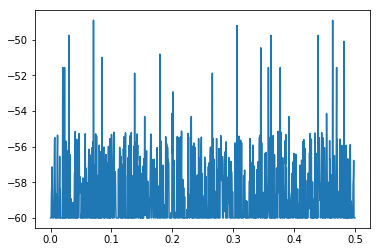

In [5]:

#ass = mdf1.analogsignals[0][0]    
#times = [i for i in range(0,len(vm_spiking[0]))]


plt.figure()
plt.plot(times[0:1000], vm_spiking[144][0:1000])
plt.show()
spiking_memb_pot0 = vm_spiking[20]
spiking_memb_pot1 = vm_spiking[21][0:1000]
spiking_memb_pot0 = vm_spiking[22]
spiking_memb_pot1 = vm_spiking[23]#[0:1000]
spiking_memb_pot1 = vm_spiking[43]

In [6]:


#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[144]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
lv_test_signal0 = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))
lv_test_signal1 = np.array(0.6*np.sin(2*np.pi*2*frequency*times+offset))

composite_signal = [ float(vm) + lv_test_signal0[i] for i,vm in enumerate(vm_spiking[144])]


In [7]:
from neuronunit.tests.dynamics import CVTest, LocalVariationTest, FiringRateTest
from neuronunit.tests import fi, dynamics
cholinergic = {'neuron':115}

test_class_params = [ dynamics.CVTest,
                 dynamics.LocalVariationTest,]


def run_test(test):
    from neuronunit.optimization import get_neab
    from neuronunit.models.reduced import ReducedModel
    from neuronunit.tests import base
    import sciunit
    from neuronunit.models import static_model
    model = static_model.StaticModel(vm=ass,name='neo_pickle_file')
    score = test.judge(model, stop_on_error = False, deep_error = True)

    return score
for i,t in enumerate(test_class_params):
    import quantities as pq

    print(i)
    if i==0:    
        observation = {}
        observation['cv'] = 0.19*pq.dimensionless 
    elif i==1:
        observation = {}
        observation['lv'] = 0.19*pq.dimensionless 

    test = t(observation=observation)

    score = run_test(test)#,pred=prediction_wave)
    print(score,'score')

0
Getting Rheobase cached data value for from AIBS dataset 354190013
attempting to recover from pickled file
Ratio = 0.19 score
1
Ratio = 0.01 score


ISI-distance: 7.06032796
SPIKE-distance: -2.25975064


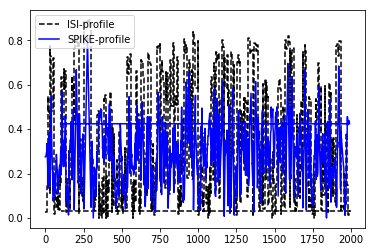

In [ ]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

Average: 0.722986247544


In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()